In [1]:
TRAIN_JSON = "/home/ra78lof/consulting_pro/SAN/san/data/ceiling_painting_segmentation/train/json_annotation_train.json"
TRAIN_DIR = "/home/ra78lof/consulting_pro/SAN/san/data/ceiling_painting_segmentation/train"

VAL_JSON = "/home/ra78lof/consulting_pro/SAN/san/data/ceiling_painting_segmentation/valid/json_annotation_val.json"
VAL_DIR = "/home/ra78lof/consulting_pro/SAN/san/data/ceiling_painting_segmentation/valid"

TEST_JSON = "/home/ra78lof/consulting_pro/SAN/san/data/ceiling_painting_segmentation/test/json_annotation_test.json"
TEST_DIR = "/home/ra78lof/consulting_pro/SAN/san/data/ceiling_painting_segmentation/test"

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# register the dataset
from detectron2.data.datasets import register_coco_instances

# visualize the dataset for test
import matplotlib
from matplotlib import pyplot as plt
import cv2
import random
from detectron2.utils.visualizer import ColorMode, Visualizer


from PIL import Image

register_coco_instances("ceiling_easy_train", {}, TRAIN_JSON, TRAIN_DIR)
register_coco_instances("ceiling_easy_val", {}, VAL_JSON, VAL_DIR)
register_coco_instances("ceiling_easy_test", {}, TEST_JSON, TEST_DIR)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



{'file_name': '/home/ra78lof/consulting_pro/SAN/san/data/ceiling_painting_segmentation/train/fmd499066_2_jpg.rf.96287ac49ecbf64d79a246574445e4db.jpg', 'height': 1280, 'width': 1280, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [310, 299, 655.992, 703.508], 'category_id': 2, 'segmentation': [[331.714, 606.208, 333.751, 609.28, 332.393, 615.936, 328.997, 620.032, 324.244, 620.544, 319.83, 621.568, 319.151, 632.32, 318.133, 642.048, 317.793, 650.24, 316.095, 659.456, 317.793, 666.112, 320.849, 669.696, 325.602, 673.28, 326.96, 677.376, 326.621, 685.056, 325.263, 692.224, 321.867, 692.736, 317.114, 689.664, 313.379, 695.296, 310.663, 705.024, 317.454, 736.778, 321.188, 759.818, 325.942, 784.906, 335.448, 808.458, 347.332, 832.522, 361.592, 858.122, 372.456, 875.018, 382.981, 890.378, 392.149, 896.01, 401.995, 896.522, 407.088, 899.594, 408.446, 907.274, 410.143, 921.098, 417.273, 932.362, 432.212, 949.77, 439.003, 958.986, 451.565, 961.034, 469.886, 962.048, 486.183, 968.192, 505.

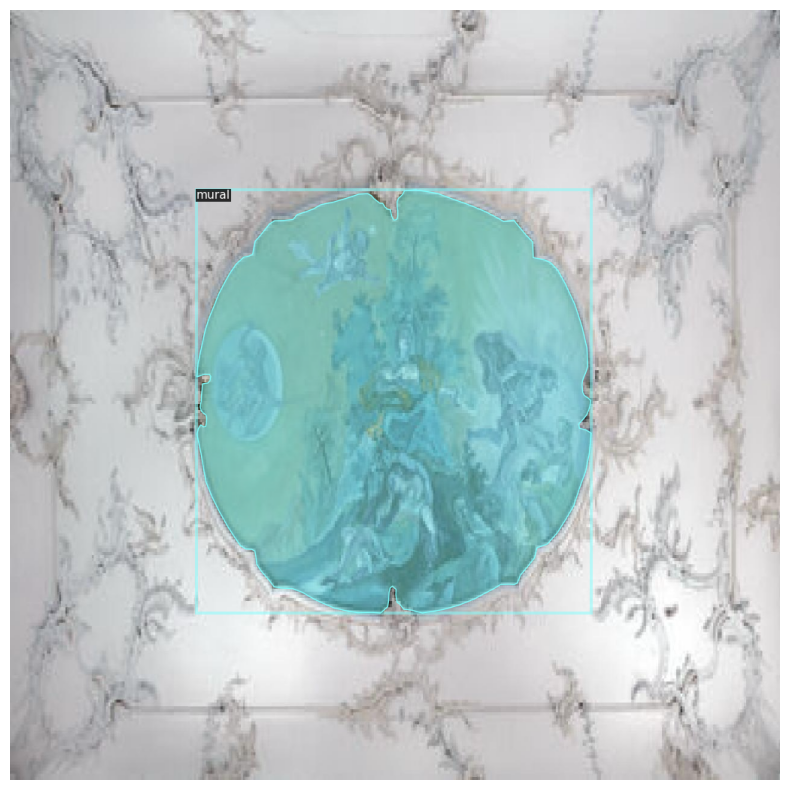

In [2]:
metadata = MetadataCatalog.get("ceiling_easy_train")
dataset_train = DatasetCatalog.get("ceiling_easy_train")

dataset_entry = dataset_train[0]
print(dataset_entry, "this is the dataset entry")
image = cv2.imread(dataset_entry["file_name"])

visualizer = Visualizer(
    image[:, :, ::-1],
    metadata=metadata, 
    scale=0.8, 
    instance_mode=ColorMode.IMAGE_BW
)

out = visualizer.draw_dataset_dict(dataset_entry)

# Visualize the image using matplotlib
plt.figure(figsize=(10, 10)) # Optional: Adjust figure size
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis('off') # Optional: Hide axes
plt.show()